In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("2022-2023.csv")

In [42]:
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01


In [43]:
data.drop(columns = {"Rk"}, inplace = True)

In [44]:
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01


In [45]:
data.dtypes

Player                object
Pos                   object
Age                    int64
Tm                    object
G                      int64
GS                     int64
MP                   float64
FG                   float64
FGA                  float64
FG%                  float64
3P                   float64
3PA                  float64
3P%                  float64
2P                   float64
2PA                  float64
2P%                  float64
eFG%                 float64
FT                   float64
FTA                  float64
FT%                  float64
ORB                  float64
DRB                  float64
TRB                  float64
AST                  float64
STL                  float64
BLK                  float64
TOV                  float64
PF                   float64
PTS                  float64
Player-additional     object
dtype: object

In [59]:
feature_cols = ["Player"]
for col in data.columns:
    if data[col].dtype == "float64" or data[col].dtype == "int64":
        feature_cols.append(col)

In [60]:
feature_cols

['Player',
 'Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [61]:
quantData = data[feature_cols]


In [62]:
targetData = pd.read_csv("2023-2024.csv")

In [63]:
targetData.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
2,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01
3,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,aldamsa01
4,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,alexani01


In [64]:
targetData.drop(columns = {"Rk"}, inplace = True)

In [68]:
targetVar = targetData[["Player", "PTS"]]

In [69]:
targetVar

,Player,PTS
0,Precious Achiuwa,7.6
1,Bam Adebayo,19.3
2,Ochai Agbaji,5.8
3,Santi Aldama,10.7
4,Nickeil Alexander-Walker,8.0
...,...,...
567,Thaddeus Young,4.2
568,Trae Young,25.7
569,Omer Yurtseven,4.6
570,Cody Zeller,1.8


In [72]:
quantData.rename(columns = {"PTS": "2022-2023 PTS"}, inplace = True)

/var/folders/yw/79t9dp_s11n0qlyl2s3cx5yw0000gn/T/ipykernel_32614/953424585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantData.rename(columns = {"PTS": "2022-2023 PTS"}, inplace = True)


In [73]:
quantData.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,2022-2023 PTS
0,Precious Achiuwa,23,55,12,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,29,42,42,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,25,75,75,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,22,59,22,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,22,77,20,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [74]:
combinedSet = quantData.merge(targetVar, on = "Player")

In [76]:
combinedSet

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,2022-2023 PTS,PTS
0,Precious Achiuwa,23,55,12,20.7,3.6,7.3,0.485,0.5,2.0,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,7.6
1,Bam Adebayo,25,75,75,34.6,8.0,14.9,0.540,0.0,0.2,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,19.3
2,Ochai Agbaji,22,59,22,20.5,2.8,6.5,0.427,1.4,3.9,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,5.8
3,Santi Aldama,22,77,20,21.8,3.2,6.8,0.470,1.2,3.5,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,10.7
4,Nickeil Alexander-Walker,24,59,3,15.0,2.2,5.0,0.444,1.0,2.7,...,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Thaddeus Young,34,54,9,14.7,2.0,3.7,0.545,0.1,0.6,...,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,4.2
446,Trae Young,24,73,73,34.8,8.2,19.0,0.429,2.1,6.3,...,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,25.7
447,Omer Yurtseven,24,9,0,9.2,1.8,3.0,0.593,0.3,0.8,...,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,4.6
448,Cody Zeller,30,15,2,14.5,2.5,3.9,0.627,0.0,0.1,...,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,1.8


In [77]:
actualFeatures = feature_cols[1:]

In [80]:
actualFeatures[25] = "2022-2023 PTS"

In [81]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [82]:
xgb_model = xgb.XGBRegressor()



In [83]:
inputVars = combinedSet.drop(columns = "PTS")
outputVars = combinedSet["PTS"]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    inputVars, outputVars, test_size=0.3, random_state=42)


In [85]:
X_train

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,2022-2023 PTS
409,Franz Wagner,21,80,80,32.6,6.8,14.0,0.485,1.6,4.5,...,0.842,0.9,3.2,4.1,3.5,1.0,0.2,2.1,2.3,18.6
108,Kris Dunn,28,22,3,25.8,5.3,9.8,0.537,0.8,1.6,...,0.774,0.4,4.1,4.5,5.6,1.1,0.5,1.6,2.6,13.2
229,Saben Lee,23,25,1,14.9,2.0,4.8,0.405,0.4,1.2,...,0.737,0.5,1.3,1.8,2.7,0.8,0.0,1.0,1.3,6.0
420,Peyton Watson,20,23,2,8.1,1.3,2.6,0.492,0.3,0.6,...,0.550,0.3,1.3,1.6,0.5,0.1,0.5,0.3,0.6,3.3
118,Dorian Finney-Smith,29,66,66,30.4,3.0,7.6,0.391,1.7,5.1,...,0.763,1.7,3.1,4.8,1.5,0.8,0.5,0.9,2.2,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Chris Duarte,25,46,12,19.5,2.7,7.2,0.369,1.2,3.8,...,0.847,0.4,2.1,2.5,1.4,0.5,0.2,0.9,1.4,7.9
270,Chimezie Metu,25,66,0,10.4,2.0,3.3,0.589,0.1,0.6,...,0.740,0.7,2.3,3.0,0.6,0.3,0.3,0.5,1.2,4.9
348,David Roddy,21,70,4,18.0,2.6,6.0,0.429,0.9,3.0,...,0.631,0.7,2.0,2.8,0.8,0.4,0.3,0.8,1.5,6.7
435,Mark Williams,21,43,17,19.3,3.7,5.8,0.637,0.0,0.0,...,0.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0


In [86]:
y_train

409    19.7
108     5.4
229     3.0
420     6.7
118     8.5
       ... 
106     3.9
270     6.5
348     6.5
435    12.7
102    10.9
Name: PTS, Length: 315, dtype: float64

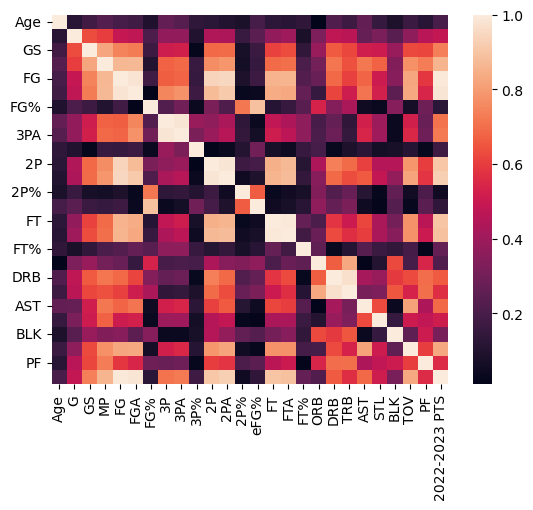

In [88]:
import seaborn as sns
sns.heatmap(X_train[actualFeatures].corr().abs())
plt.show()

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [131]:
X_train.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

In [132]:
Model

[]

In [133]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train[actualFeatures], y_train)

In [134]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,3.134666,0.782851
1,Ridge Regression,3.079403,0.790143
2,Lasso Regression,3.085639,0.791394
3,K Neighbors Regressor,3.693939,0.699156
4,Decision Tree Regressor,4.675526,0.536088
5,Random Forest Regressor,3.216701,0.776070
6,Gradient Boosting Regressor,3.242455,0.769000
7,Adaboost Regressor,3.446984,0.741543


In [135]:
Lasso()

Lasso()

In [123]:
LassoRegression = Lasso(max_iter = 5000)
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(X_train[actualFeatures],y_train)

/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.414e+02, tolerance: 1.234e+00
  model = cd_fast.enet_coordinate_descent(
/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+03, tolerance: 1.217e+00
  model = cd_fast.enet_coordinate_descent(
/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

GridSearchCV(cv=5, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [124]:
print("Best value for lambda : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  -9.48971137919178


In [125]:
newLassoReg = Lasso(alpha = 0.01)

In [129]:
print(cross_val_score(newLassoReg, X_train[actualFeatures], y_train, scoring = 'r2', cv = 10).mean())

0.7694618004698194


/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+02, tolerance: 1.328e+00
  model = cd_fast.enet_coordinate_descent(
/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+02, tolerance: 1.402e+00
  model = cd_fast.enet_coordinate_descent(
/Users/pranav/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train[actualFeatures], y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                          min_samples_split=100, n_estimators=30,
                          random_state=1)
R Squared: 0.7685584153237064


In [142]:
np.linspace(1, 10, 100)

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [143]:
parameters = {'alpha':np.linspace(0, 10, 100)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train[actualFeatures],y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
# best_model = Ridge_reg.best_estimator_
# best_model.fit(X,y)

Ridge(alpha=8.484848484848484)


In [145]:
best_model = Ridge_reg.best_estimator_

In [153]:
rmse = []

In [154]:
rmse.append(np.sqrt((-1) * cross_val_score(best_model, X_train[actualFeatures], y_train, cv=5, 
                                               scoring='neg_mean_squared_error')))

In [155]:
rmse

[array([3.37179821, 2.95159905, 2.64729845, 3.34942099, 2.90908287])]

In [156]:
X_train

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,2022-2023 PTS
409,Franz Wagner,21,80,80,32.6,6.8,14.0,0.485,1.6,4.5,...,0.842,0.9,3.2,4.1,3.5,1.0,0.2,2.1,2.3,18.6
108,Kris Dunn,28,22,3,25.8,5.3,9.8,0.537,0.8,1.6,...,0.774,0.4,4.1,4.5,5.6,1.1,0.5,1.6,2.6,13.2
229,Saben Lee,23,25,1,14.9,2.0,4.8,0.405,0.4,1.2,...,0.737,0.5,1.3,1.8,2.7,0.8,0.0,1.0,1.3,6.0
420,Peyton Watson,20,23,2,8.1,1.3,2.6,0.492,0.3,0.6,...,0.550,0.3,1.3,1.6,0.5,0.1,0.5,0.3,0.6,3.3
118,Dorian Finney-Smith,29,66,66,30.4,3.0,7.6,0.391,1.7,5.1,...,0.763,1.7,3.1,4.8,1.5,0.8,0.5,0.9,2.2,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Chris Duarte,25,46,12,19.5,2.7,7.2,0.369,1.2,3.8,...,0.847,0.4,2.1,2.5,1.4,0.5,0.2,0.9,1.4,7.9
270,Chimezie Metu,25,66,0,10.4,2.0,3.3,0.589,0.1,0.6,...,0.740,0.7,2.3,3.0,0.6,0.3,0.3,0.5,1.2,4.9
348,David Roddy,21,70,4,18.0,2.6,6.0,0.429,0.9,3.0,...,0.631,0.7,2.0,2.8,0.8,0.4,0.3,0.8,1.5,6.7
435,Mark Williams,21,43,17,19.3,3.7,5.8,0.637,0.0,0.0,...,0.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0


In [158]:
y_pred = best_model.predict(X_test[actualFeatures])

In [159]:
from sklearn.metrics import root_mean_squared_error

In [165]:
print(root_mean_squared_error(y_test, y_pred))

2.8589952068014224


In [166]:
targetData.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,alexani01


In [ ]:
##Now - Get Predictions for next season using current season's numbers

In [168]:
featuresActual = actualFeatures
len(featuresActual)

26

In [169]:
featuresActual[25] = "2022-2023 PTS" ##ACTUALLY THE PPG OF 2023-2024 SEASON, BUT NAMING HAD OT BE FIXED FOR MODEL TO FIT

In [172]:
targetData.rename(columns = {"PTS": "2022-2023 PTS"}, inplace = True)

In [175]:
targetData.fillna(0, inplace = True)

In [176]:
nextSeasonPredictions = best_model.predict(targetData[actualFeatures])

In [177]:
nextSeasonPredictions

array([ 7.23612122, 19.22036543,  6.8419253 , 10.65760896,  7.77049692,
       12.09500798, 15.91786804,  0.59158695,  6.88747934,  5.56977924,
       26.90720097,  1.27986874, 11.40875851, 13.38262215,  1.39710546,
       14.76477006, 16.59765435,  1.94635499,  1.10978172, 10.67865371,
        3.37108486,  5.37676399, 19.64859575,  4.91417371, 22.9129098 ,
       20.21396762, 10.34120898,  4.33328836, 12.1395121 , 18.5072468 ,
       19.06795536,  2.80889973,  3.83908148,  4.32695159,  3.42718546,
        5.03390733, 15.34152249, 11.16469635,  4.82424896,  3.86652365,
        5.65338788,  4.72642513, 12.50734586,  5.43218527,  3.46047848,
        2.83948845,  5.90489068,  2.97462819,  3.3173568 , 15.16089199,
       13.26541181,  5.44827668,  2.96225775, 24.04368619,  5.80835985,
        5.44434702,  4.17511981,  2.45083993, 10.16367632,  7.60114559,
       19.48846427, 20.79540506,  3.83791549,  5.02354421, 12.26782012,
        3.98519125, 11.92031424, 10.1744036 ,  1.67313601,  2.49

In [179]:
predictedPPG = pd.DataFrame(nextSeasonPredictions, index = targetData['Player'])

In [187]:
predictedPPG.rename(columns = {0: "Predicted PPG"}, inplace = True)

In [188]:
predictedPPG.columns


Index(['Predicted PPG'], dtype='object')

In [189]:
predictedPPG

,Predicted PPG
Player,
Precious Achiuwa,7.236121
Bam Adebayo,19.220365
Ochai Agbaji,6.841925
Santi Aldama,10.657609
Nickeil Alexander-Walker,7.770497
...,...
Thaddeus Young,2.161156
Trae Young,21.590554
Omer Yurtseven,5.023149


In [192]:
predictedPPG.to_csv("2024-2025 Predicted Points Per Game.csv")